In [1]:
import pandas as pd
import os
os.chdir("D:/demo/ML/demo_dominicks")

ana_sales = pd.read_parquet('data/raw/ana_sales_data.parquet')
ana_upc = pd.read_parquet('data/raw/ana_upc.parquet')
demographic_data = pd.read_parquet('data/raw/demographic_data.parquet')

### Продажи анальгетиков

In [2]:
ana_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7241655 entries, 0 to 7339216
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   store   int64  
 1   upc     int64  
 2   week    int64  
 3   move    int64  
 4   qty     int64  
 5   price   float64
 6   sale    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 442.0+ MB


array([[<Axes: title={'center': 'store'}>,
        <Axes: title={'center': 'upc'}>,
        <Axes: title={'center': 'week'}>,
        <Axes: title={'center': 'move'}>],
       [<Axes: title={'center': 'qty'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

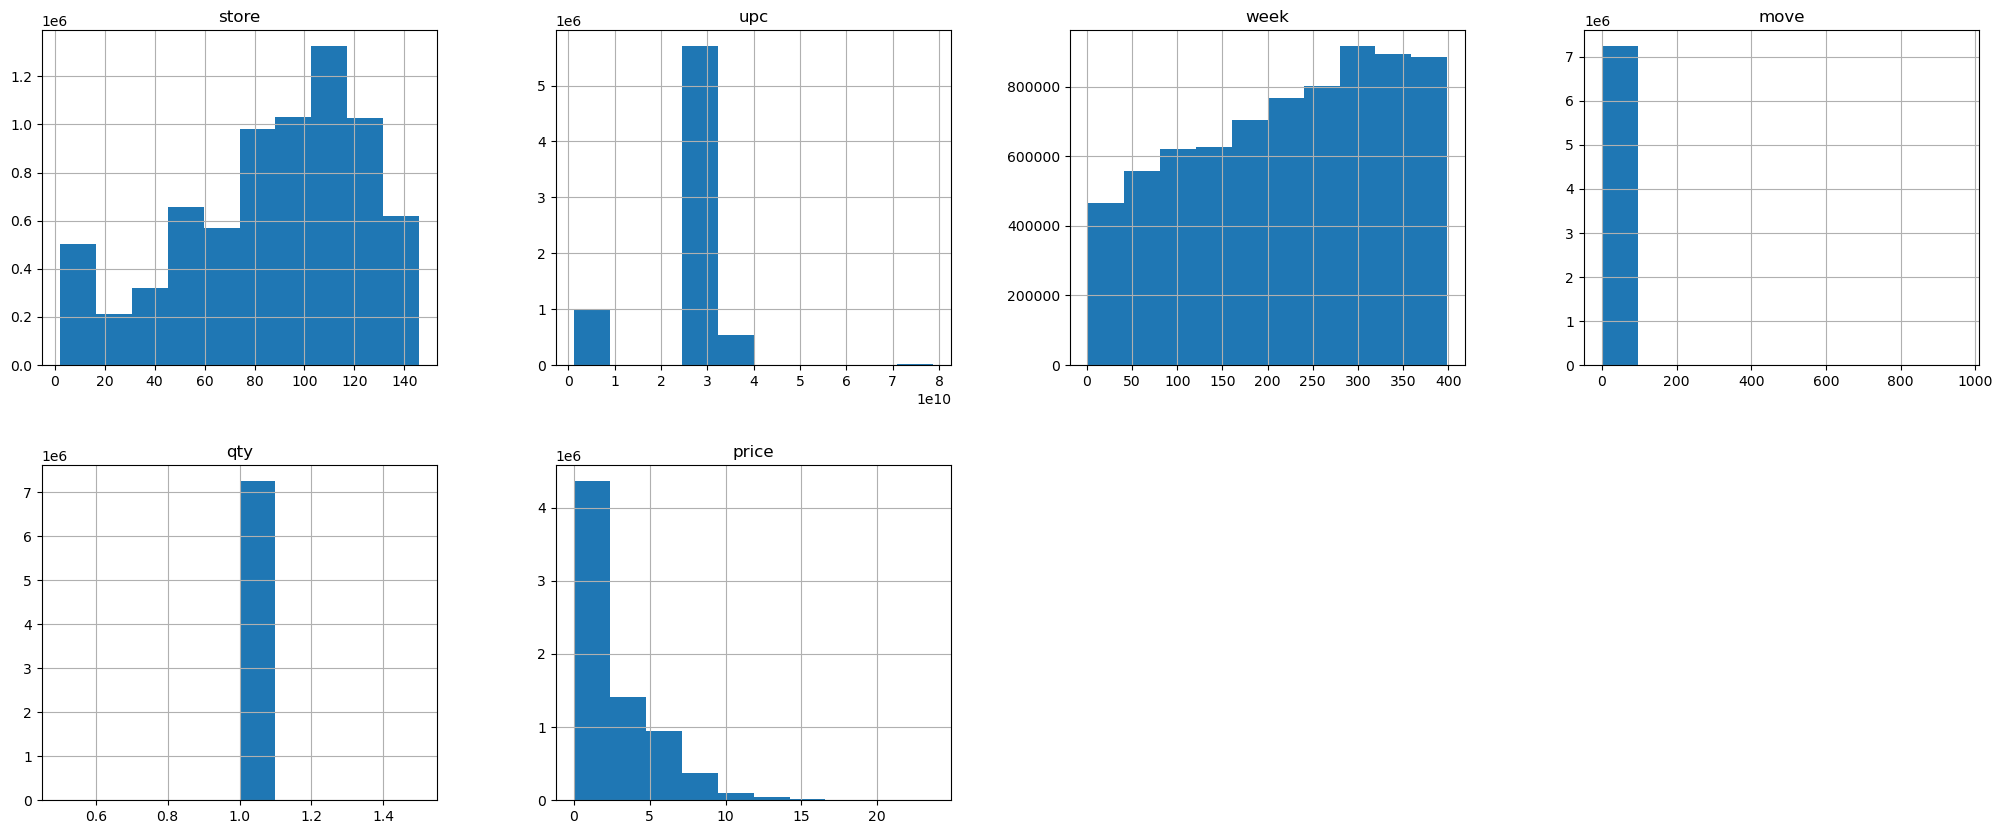

In [7]:
ana_sales['sale_cat'] = ana_sales.sale.astype('category')
ana_sales.hist(figsize=(25, 10), layout = (-1, 4))

<Axes: xlabel='count', ylabel='sale'>

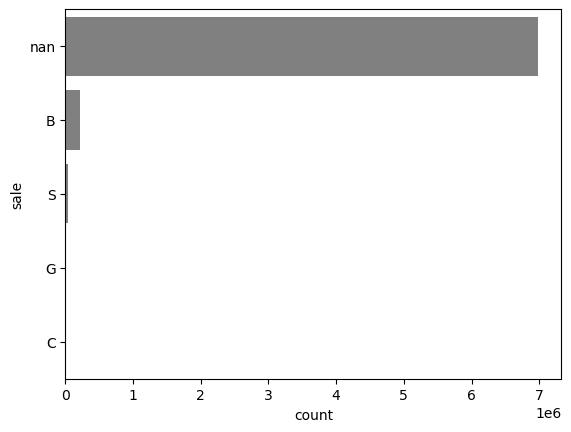

In [9]:
import seaborn as sns
sns.countplot(ana_sales['sale'], color='gray')

In [4]:
ana_sales.isna().sum()

store          0
upc            0
week           0
move           0
qty            0
price          0
sale     6979032
dtype: int64

In [5]:
ana_sales.nunique()

store      93
upc       641
week      392
move      172
qty         1
price    1152
sale        4
dtype: int64

In [61]:
vals = ana_sales.move.value_counts()
vals

move
0      4201483
1      1332010
2       686505
3       375911
4       218957
        ...   
567          1
486          1
304          1
182          1
252          1
Name: count, Length: 172, dtype: int64

In [45]:
ana_sales.qty.value_counts()

qty
1    7241655
Name: count, dtype: int64

#### Выводы по датасету продаж анальгетиков

Пропущенных данных нет. Встречаются значения `None` в колонке `sale`. Но эти значения являются существенными, поскольку обозначают отсутствие маркетинговых акций на момент продажи. Датасет содержит информацию по `93` магазинам, в которых продаются `641` позиция анальгетиков. Столбец `qty` ценных данных не содержит, так как просто равен '1'. Столбец `move` имеет большие выбросы на значениях '0' и '1' - то есть покупатели в подавляющем большинстве случаев покупают либо '1' упаковку лекарста, либо не покупают вообще. При подготовке данных нужно будет вычислить сумму продажи в деньгах.

### Список позиций по анальгетикам

In [2]:
ana_upc.head()

,com_code,upc,descrip,size,case,nitem
0,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,6,7342431
1,953,1192662108,SLEEPINAL SOFTGEL,8 CT,6,7333311
2,953,1650001020,NERVINE TABS,30 CT,1,8430820
3,953,1650001022,NERVINE SLEEP AID,12 CT,1,8430840
4,953,1650004106,ALKA-SELTZER GOLD,20 CT,1,8430880


In [13]:
ana_upc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   com_code  641 non-null    int64 
 1   upc       641 non-null    int64 
 2   descrip   641 non-null    object
 3   size      641 non-null    object
 4   case      641 non-null    int64 
 5   nitem     641 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 30.2+ KB


In [64]:
ana_upc.upc.unique().size

641

In [46]:
ana_upc.describe(include=object)

,descrip,size
count,641,641
unique,474,74
top,ADVIL,50 CT
freq,6,90


#### Выводы по списку анальгетиков

В продаже `641` анальгетик. Есть данные о числе таблеток в упаковке.

### Данные о населении

In [11]:
demographic_data.head()

,store,age60,age9,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5
1,2.0,0.232865,0.117509,0.248935,0.114280,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.927280,0.376927
2,4.0,0.262030,0.095090,0.220789,0.062161,10.646972,0.088123,0.362122,0.522236,2.373200,1.000000,1.104470,0.772489
3,5.0,0.117368,0.141433,0.321226,0.053875,10.922371,0.103092,0.410568,0.535883,3.801998,0.681818,1.600573,0.736307
4,8.0,0.252394,0.123155,0.095173,0.035243,10.597010,0.131750,0.283075,0.054227,2.636333,1.500000,2.905384,0.641016
5,9.0,0.269119,0.103503,0.222172,0.032619,10.787151,0.096830,0.358995,0.505747,1.103279,0.666667,1.820474,0.441268


In [52]:
demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 1 to 107
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   store     107 non-null    float64
 1   age60     97 non-null     float32
 2   age9      97 non-null     float32
 3   educ      97 non-null     float32
 4   ethnic    97 non-null     float32
 5   income    97 non-null     float32
 6   hhlarge   97 non-null     float32
 7   workwom   97 non-null     float32
 8   hval150   97 non-null     float32
 9   sstrdist  85 non-null     float32
 10  sstrvol   85 non-null     float32
 11  cpdist5   85 non-null     float32
 12  cpwvol5   85 non-null     float32
dtypes: float32(12), float64(1)
memory usage: 6.7 KB


In [65]:
demographic_data.store.unique().size

107

In [51]:
demographic_data.iloc[:,1:].describe()

,age60,age9,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,85.000000,85.000000,85.000000,85.000000
mean,0.170046,0.140239,0.218815,0.153622,10.609434,0.118105,0.358464,0.338482,5.026880,1.214298,2.108618,0.447505
std,0.063971,0.026921,0.107968,0.182897,0.278059,0.031933,0.051303,0.236683,3.476942,0.528324,0.737315,0.224417
min,0.058054,0.046071,0.049550,0.022828,9.867083,0.013506,0.244463,0.002509,0.132097,0.400000,0.772530,0.094562
25%,0.119626,0.120839,0.144310,0.043972,10.480017,0.098154,0.313190,0.134418,2.636333,0.727273,1.626192,0.289203
50%,0.160414,0.139877,0.220789,0.074656,10.635326,0.113268,0.354977,0.342017,4.235049,1.115385,1.963412,0.394100
75%,0.213309,0.155391,0.279952,0.187761,10.775053,0.135341,0.401900,0.505747,6.497972,1.562500,2.533640,0.602073
max,0.312928,0.200156,0.528362,0.995691,11.236197,0.216354,0.472308,0.916699,17.855951,2.571429,4.107902,1.143367


In [47]:
demographic_data.isna().sum()

store        0
age60       10
age9        10
educ        10
ethnic      10
income      10
hhlarge     10
workwom     10
hval150     10
sstrdist    22
sstrvol     22
cpdist5     22
cpwvol5     22
dtype: int64

In [71]:
demographic_data.isna().any(axis=1)

1      False
2      False
3      False
4      False
5      False
       ...  
103     True
104     True
105     True
106     True
107     True
Length: 107, dtype: bool

In [84]:
demographic_data[demographic_data.isna().any(axis=1)].sample(10)

,store,age60,age9,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5
69,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,307.0,0.104416,0.181204,0.123701,0.070966,10.605247,0.146939,0.394064,0.136884,NaN,NaN,NaN,NaN
99,304.0,0.112221,0.115344,0.237379,0.345625,10.183881,0.078774,0.341639,0.676901,NaN,NaN,NaN,NaN
100,305.0,0.142966,0.165875,0.120727,0.022828,10.523392,0.127130,0.339649,0.179668,NaN,NaN,NaN,NaN
97,302.0,0.102426,0.162099,0.281232,0.074278,10.665764,0.123527,0.410053,0.245614,NaN,NaN,NaN,NaN
106,312.0,0.161864,0.151115,0.122721,0.195317,10.500509,0.139724,0.309058,0.096444,NaN,NaN,NaN,NaN
104,309.0,0.067192,0.200156,0.278103,0.204785,10.757754,0.152418,0.392109,0.406664,NaN,NaN,NaN,NaN
95,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,310.0,0.177015,0.134641,0.283289,0.045067,10.861496,0.100310,0.421429,0.594775,NaN,NaN,NaN,NaN


#### Выводы по демографии

Датасет содержит данные по `107` магазинам. Есть пропуски. Перед обучением моделей нужно чистить и выбирать по нужным магазинам.